In [1]:
import os
from time import localtime, strftime
import warnings
import argparse

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors
from LightPipes import *

import darkfield.mmmUtils as mu
import darkfield.rossendorfer_farbenliste as rofl
import darkfield.diffra_v2 as df

In [6]:
4.8e-10/5.7e-2

8.421052631578947e-09

In [4]:
2600/60

43.333333333333336

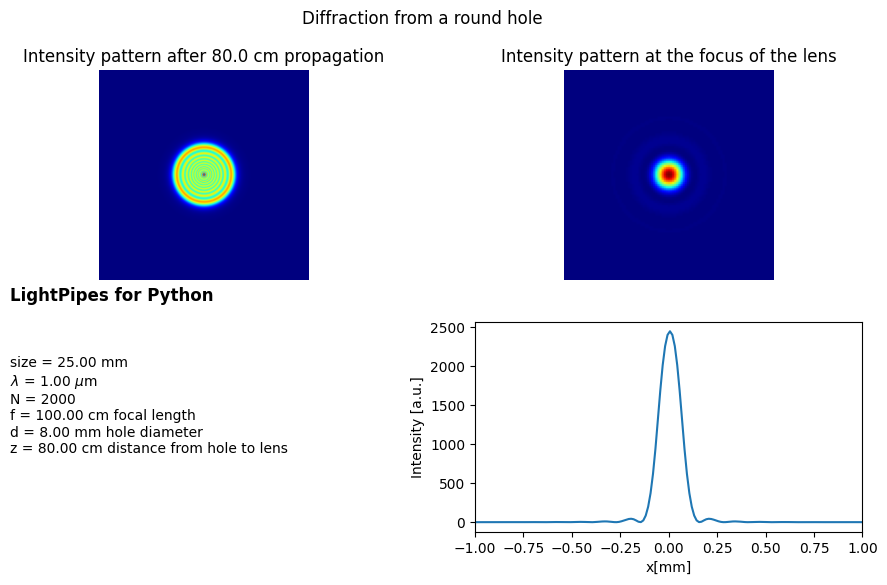

In [21]:
wavelength=1*um
size=25.0*mm
N=2000
N2=int(N/2)
z=80*cm
d=8*mm
f=100*cm
F=Begin(size,wavelength,N)
F=CircAperture(d/2, 0, 0, F)
F=Fresnel(F,z)
I1=Intensity(F)
F=Lens(F,f)
F=Forvard(f,F)
I=Intensity(0,F)

s1 =    r'LightPipes for Python' + '\n'
s2 =    f'size = {size/mm:4.2f} mm' + '\n'\
        f'$\\lambda$ = {wavelength/um:4.2f} $\\mu$m' + '\n'\
        f'N = {N:d}' + '\n' +\
        f'f = {f/cm:4.2f} cm focal length' + '\n'\
        f'd = {d/mm:4.2f} mm hole diameter' + '\n'\
        f'z = {z/cm:4.2f} cm distance from hole to lens' + '\n'\

fig=plt.figure(figsize=(11,6))
fig.suptitle("Diffraction from a round hole")
ax1 = fig.add_subplot(221);ax1.axis('off')
ax2 = fig.add_subplot(222);ax2.axis('off')
ax3 = fig.add_subplot(223);ax3.axis('off')
ax4 = fig.add_subplot(224)
ax1.set_title(f'Intensity pattern after {z/cm:4.1f} cm propagation')
ax1.imshow(I1,cmap='jet')
ax2.set_xlim(N2-50,N2+50)
ax2.set_ylim(N2-50,N2+50)
ax2.set_title('Intensity pattern at the focus of the lens')
ax2.imshow(I,cmap='jet')
ax3.text(0.0,1.0,s1,fontsize=12, fontweight='bold')
ax3.text(0.0,0.3,s2)
X=np.linspace(-size/2,size/2,N)
ax4.plot(X/mm,I[N2]); ax4.set_xlabel('x[mm]'); ax4.set_ylabel('Intensity [a.u.]')
ax4.set_xlim(-1,1)
plt.show()

850.0000000000001


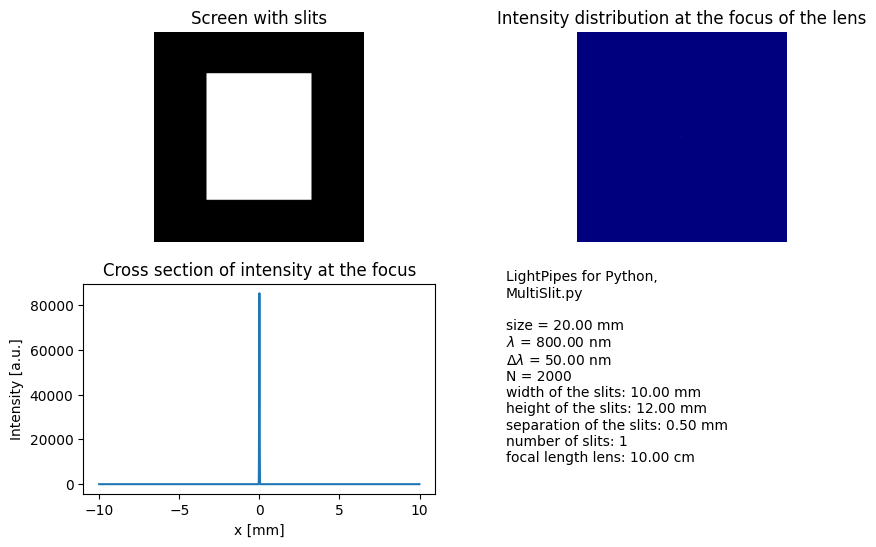

In [30]:
wavelength=800*nm
Dlambda=50*nm
size=20*mm
N=2000
N2=int(N/2)
x = np.linspace(0,np.pi/2,100)
SlitSeparation=0.5*mm
f=10*cm
Nslits=1
SlitHeight=12*mm
SlitWidth=10*mm
Nheight=int(SlitHeight/size*N)
Nwidth=int(SlitWidth/size*N)
Fslit=np.ones((Nheight,Nwidth))
F1=Begin(size,wavelength,N)
F1=RowOfFields(F1,Fslit,Nslits,SlitSeparation)
Islits=Intensity(F1)
F1=Lens(F1,f)
F1=Forvard(F1,f)
F11=Interpol(F1,size,N,magnif=4)
Iscreen1=Intensity(F11)
F2=Begin(size,wavelength+Dlambda,N)
F2=RowOfFields(F2,Fslit,Nslits,SlitSeparation)
F2=Lens(F2,f)
F2=Forvard(F2,f)
F22=Interpol(F2,size,N,magnif=4)
Iscreen2=Intensity(F22)
F3=BeamMix(F11,F22)
Iscreen3=Intensity(F3)
print(F22.lam/nm)

X=np.arange(N)
X=(X/N-1/2)*size/mm
s= r'LightPipes for Python,' + '\n' +\
  r'MultiSlit.py'+ '\n\n'\
  r'size = {:4.2f} mm'.format(size/mm) + '\n' +\
  r'$\lambda$ = {:4.2f} nm'.format(wavelength/nm) + '\n' +\
  r'$\Delta\lambda$ = {:4.2f} nm'.format(Dlambda/nm) + '\n' +\
  r'N = {:d}'.format(N) + '\n' +\
  r'width of the slits: {:4.2f} mm'.format(SlitWidth/mm) + '\n' +\
  r'height of the slits: {:4.2f} mm'.format(SlitHeight/mm) + '\n' +\
  r'separation of the slits: {:4.2f} mm'.format(SlitSeparation/mm) + '\n' +\
  r'number of slits: {:d}'.format(Nslits) + '\n' +\
  r'focal length lens: {:4.2f} cm'.format(f/cm) + '\n\n'

fig=plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222);#ax2.set_ylim(bottom=900,top=1100)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.imshow(Islits,cmap='gray',aspect='equal');ax1.axis('off'); ax1.set_title('Screen with slits')
ax2.imshow(Iscreen1+Iscreen2,cmap='jet',aspect='equal');ax2.axis('off'); ax2.set_title('Intensity distribution at the focus of the lens')
#ax2.margins(x=0, y=-0.45)
ax3.plot(X,(Iscreen1+Iscreen2)[N2]); ax3.set_xlabel('x [mm]'); ax3.set_ylabel('Intensity [a.u.]'); ax3.set_title('Cross section of intensity at the focus')
ax4.text(0,0,s); ax4.axis('off')
plt.show()

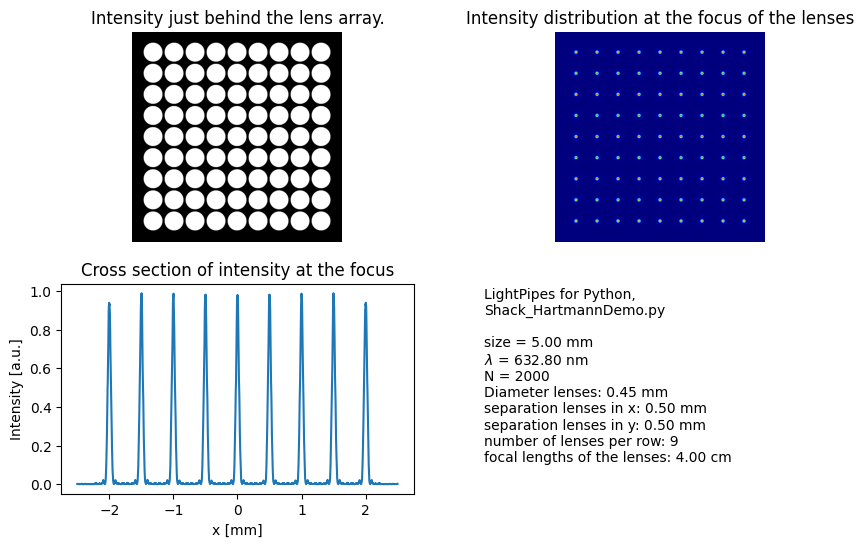

In [33]:
wavelength=632.8*nm
size=5*mm
N=2000

x_sep=0.5*mm
y_sep=0.5*mm
size_field=1.0*x_sep
sy=0*mm
f=4*cm
Dlens=0.45*mm
Nfields=9
size=(Nfields+1)*x_sep

F=Begin(size,wavelength,N)
Nfield=int(size_field/size*N)
Ffield=Begin(size_field,wavelength,Nfield)
Ffield=CircAperture(Ffield,Dlens/2)
Ffield=Lens(Ffield,f)

F=FieldArray2D(F,Ffield,Nfields,Nfields,x_sep,y_sep)
Ifields=Intensity(F)

X=np.arange(N)
X=(X/N-1/2)*size/mm

F1=Forvard(F,f)
Iscreen1=Intensity(F1,1)

F2=Zernike(F, 2, 0, size/2, 3, norm='True', units='lam'); S=ZernikeName(4) # Defocus
#F2=Zernike(F,3,-1,size/2,2,norm='True',units='lam'); S=ZernikeName(7)# Vertical coma 
F2=Fresnel(F2,f)
Iscreen2=Intensity(F2,1)

s= r'LightPipes for Python,' + '\n' +\
  r'Shack_HartmannDemo.py'+ '\n\n'\
  r'size = {:4.2f} mm'.format(size/mm) + '\n' +\
  r'$\lambda$ = {:4.2f} nm'.format(wavelength/nm) + '\n' +\
  r'N = {:d}'.format(N) + '\n' +\
  r'Diameter lenses: {:4.2f} mm'.format(Dlens/mm) + '\n' +\
  r'separation lenses in x: {:4.2f} mm'.format(x_sep/mm) + '\n' +\
  r'separation lenses in y: {:4.2f} mm'.format(y_sep/mm) + '\n' +\
  r'number of lenses per row: {:d}'.format(Nfields) + '\n' +\
  r'focal lengths of the lenses: {:4.2f} cm'.format(f/cm) + '\n\n'
  
fig=plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222); #ax2.set_ylim(bottom=130,top=170)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.imshow(Ifields,cmap='gray',aspect='equal');ax1.axis('off'); ax1.set_title('Intensity just behind the lens array.')
ax2.imshow(Iscreen1,cmap='jet',aspect='equal');ax2.axis('off'); ax2.set_title('Intensity distribution at the focus of the lenses')
ax3.plot(X,Iscreen1[int(N/2)]); ax3.set_xlabel('x [mm]'); ax3.set_ylabel('Intensity [a.u.]'); ax3.set_title('Cross section of intensity at the focus')
ax4.text(0,0,s); ax4.axis('off')
plt.show()

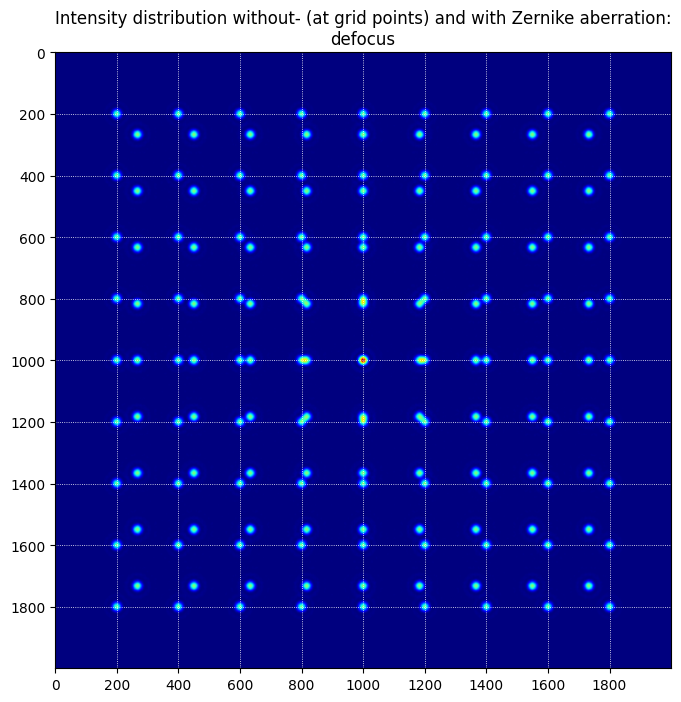

In [31]:
wavelength=632.8*nm
size=5*mm
N=2000

x_sep=0.5*mm
y_sep=0.5*mm
size_field=1.0*x_sep
sy=0*mm
f=4*cm
Dlens=0.45*mm
Nfields=9
size=(Nfields+1)*x_sep

F=Begin(size,wavelength,N)
Nfield=int(size_field/size*N)
Ffield=Begin(size_field,wavelength,Nfield)
Ffield=CircAperture(Ffield,Dlens/2)
Ffield=Lens(Ffield,f)

F=FieldArray2D(F,Ffield,Nfields,Nfields,x_sep,y_sep)
Ifields=Intensity(F)

F1=Forvard(F,f)
Iscreen1=Intensity(F1,1)

F2=Zernike(F, 2, 0, size/2, 3, norm='True', units='lam'); S=ZernikeName(4) # Defocus
#F2=Zernike(F,3,-1,size/2,2,norm='True',units='lam'); S=ZernikeName(7)# Vertical coma 
F2=Fresnel(F2,f)
Iscreen2=Intensity(F2,1)

fig2=plt.figure(figsize=(8,8))
tick_step=200
plt.imshow(Iscreen1+Iscreen2,cmap='jet',aspect='equal');plt.axis('on');plt.xticks(np.arange(0, N, tick_step));plt.yticks(np.arange(0, N, tick_step))
plt.grid(color='white', ls='dotted',linewidth='0.6')
plt.title(r'Intensity distribution without- (at grid points) and with Zernike aberration:'+'\n'+S)
plt.show()



